In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Working with code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

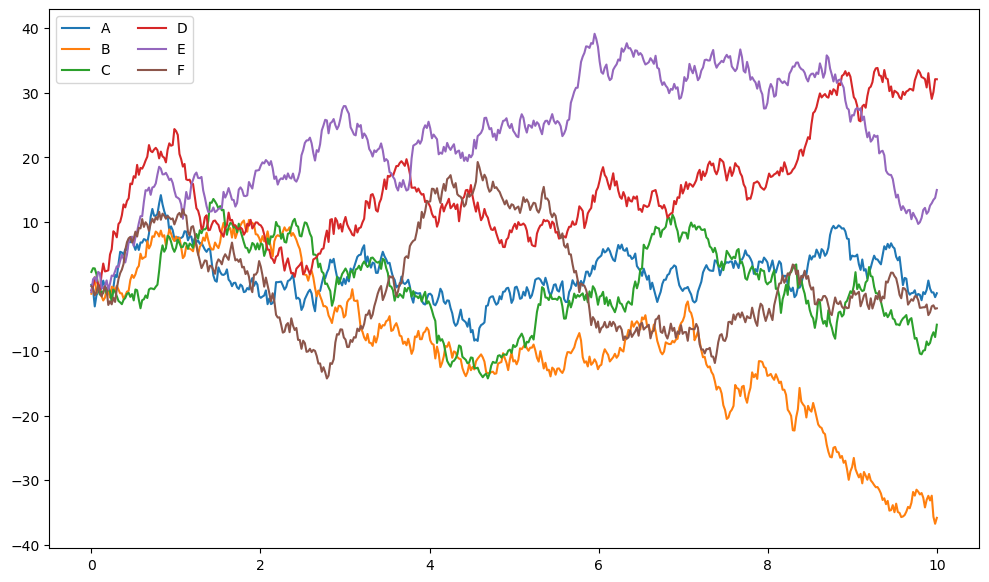

In [4]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

# Interacting with data

In [5]:
import requests
import pandas as pd

In [6]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [7]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-03-19 23:47:43.137322')

In [8]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [9]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

Bitcoin:


In [10]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,27881.443787,28008.857988,27754.218935,27880.733728,119.284297,3.332215e+06
std,353.699073,372.638745,343.200161,352.293430,149.408396,4.163955e+06
min,26739.000000,27312.000000,26688.000000,26700.000000,1.039072,2.879835e+04
25%,27602.000000,27673.000000,27500.000000,27599.000000,38.369904,1.085128e+06
50%,27866.000000,28023.000000,27729.000000,27862.000000,72.984296,2.055620e+06
75%,28172.000000,28288.000000,28037.000000,28171.000000,140.455900,3.943844e+06
max,28700.000000,29380.000000,28539.000000,28700.000000,1224.170584,3.344737e+07


In [11]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-03-20 00:00:00,28194,28372,27997,28054,137.614363,3.881255e+06
2023-03-20 01:00:00,28081,28134,27888,27913,146.958145,4.112832e+06
2023-03-20 02:00:00,27908,27963,27680,27765,169.501363,4.709910e+06
2023-03-20 03:00:00,27754,27824,27357,27517,183.672075,5.062919e+06
2023-03-20 04:00:00,27523,27570,27231,27372,152.395532,4.166322e+06


<AxesSubplot:xlabel='CloseTime'>

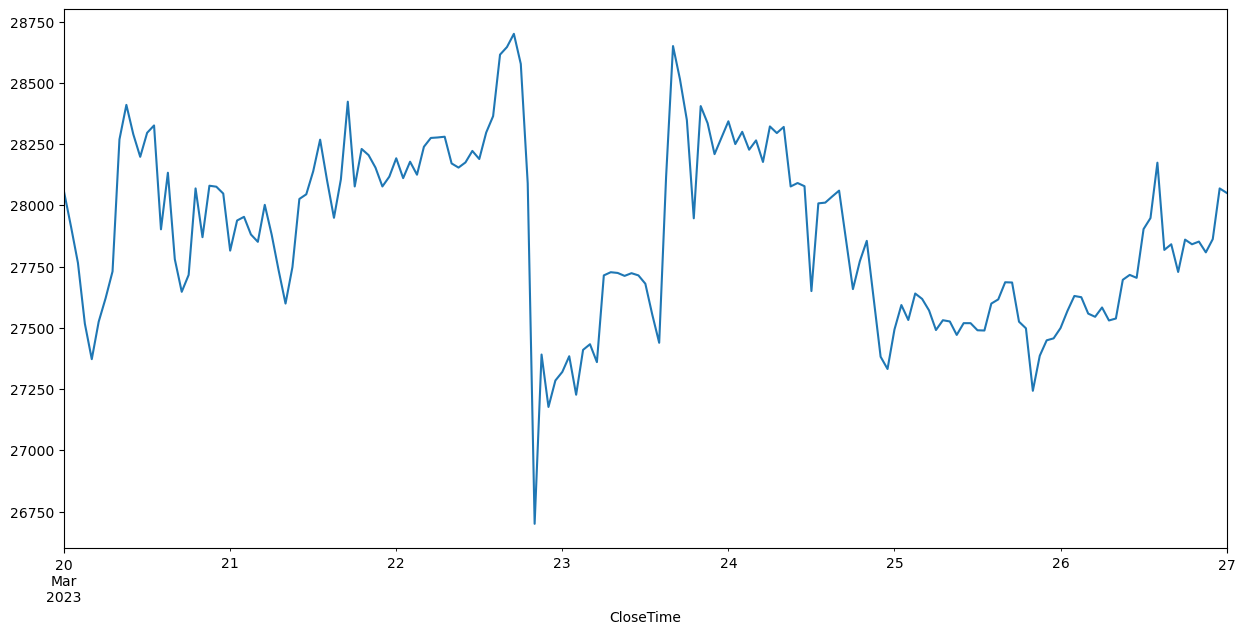

In [12]:
btc['ClosePrice'].plot(figsize=(15, 7))

Ether:

In [13]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-03-20 00:00:00,1810.1,1815.9,1780.5,1785.9,643.373157,1.163104e+06
2023-03-20 01:00:00,1786.5,1791.0,1771.8,1777.4,494.283554,8.807264e+05
2023-03-20 02:00:00,1777.0,1784.2,1767.8,1780.0,432.978068,7.706037e+05
2023-03-20 03:00:00,1780.0,1784.8,1756.5,1772.3,349.874189,6.193303e+05
2023-03-20 04:00:00,1771.8,1773.1,1747.3,1757.6,373.752430,6.564532e+05


<AxesSubplot:xlabel='CloseTime'>

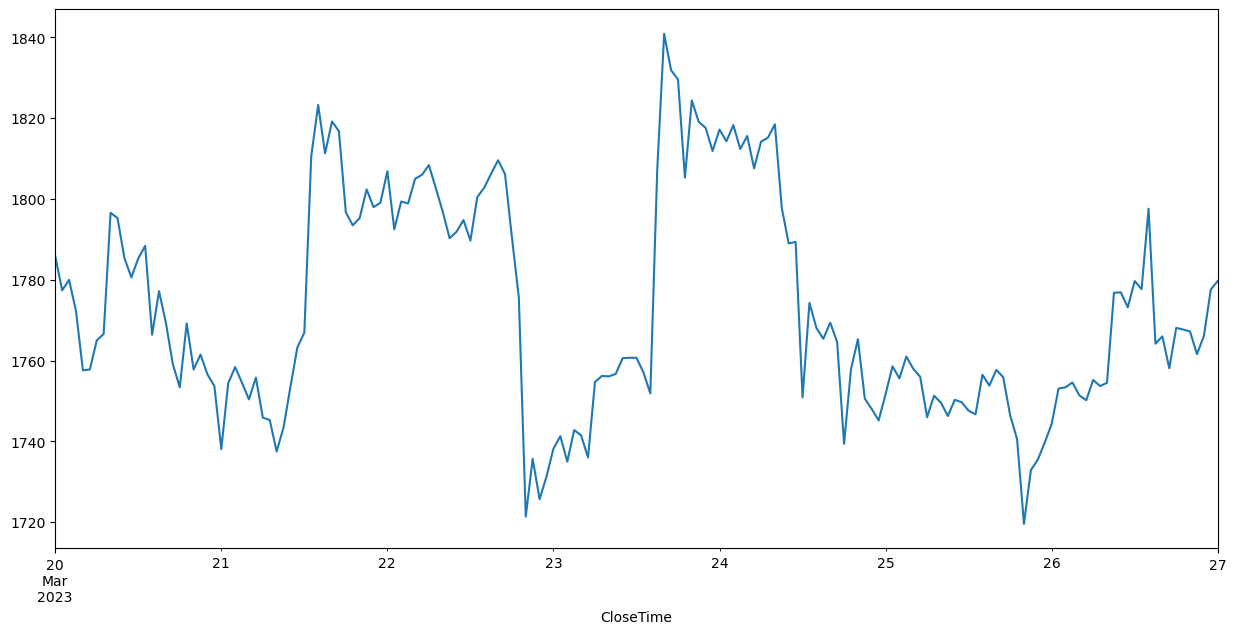

In [14]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [15]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-03-20 00:00:00,1810.1,1815.9,1780.5,1785.9,643.373157,1.163104e+06
2023-03-20 01:00:00,1786.5,1791.0,1771.8,1777.4,494.283554,8.807264e+05
2023-03-20 02:00:00,1777.0,1784.2,1767.8,1780.0,432.978068,7.706037e+05
2023-03-20 03:00:00,1780.0,1784.8,1756.5,1772.3,349.874189,6.193303e+05
2023-03-20 04:00:00,1771.8,1773.1,1747.3,1757.6,373.752430,6.564532e+05


Bonus: Dynamic plots with Bokeh
Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [16]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [17]:
output_notebook()

Loading BokehJS ...

In [18]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

Exporting to Excel

In [19]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [20]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [21]:
eth.to_excel(writer, sheet_name='Ether')

In [22]:
writer.save()